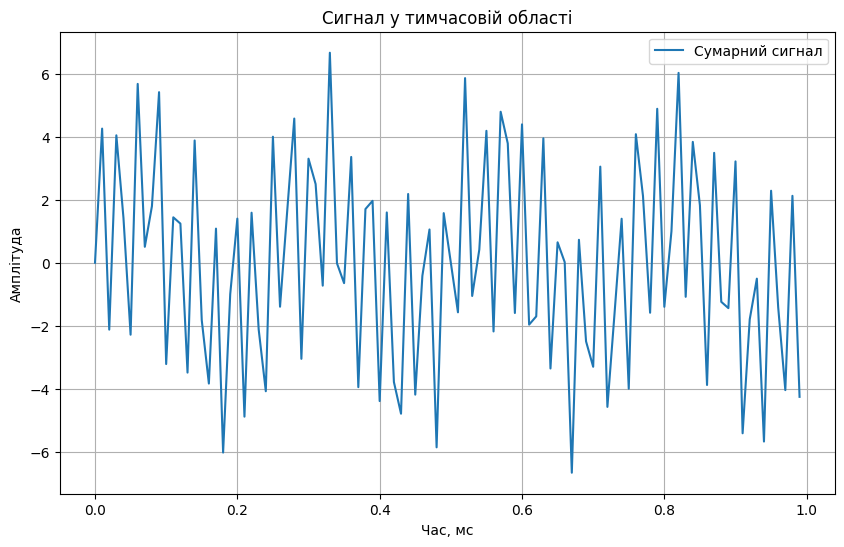

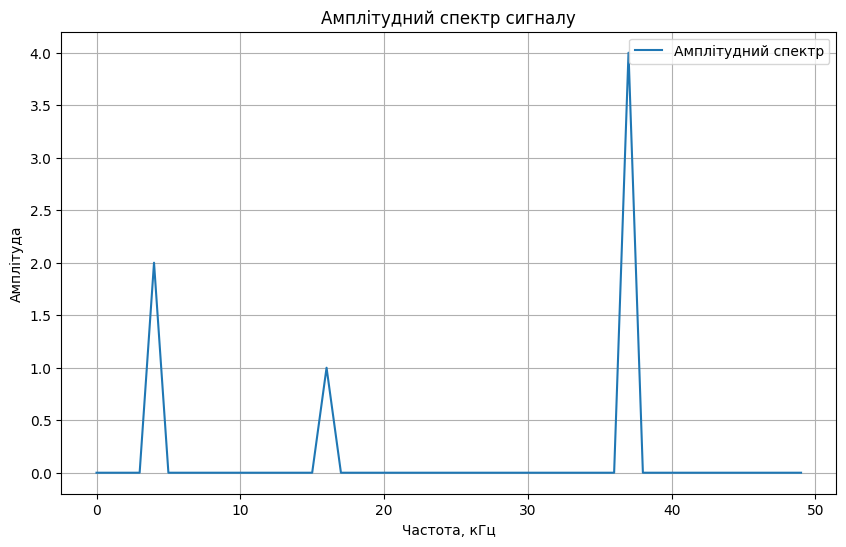

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq
from scipy.io import wavfile
from scipy.signal import butter, filtfilt, sosfiltfilt

# Параметри для варіанту 4
f1 = 4  # Частота першої гармоніки, кГц
A1 = 2  # Амплітуда першої гармоніки
f2 = 16  # Частота другої гармоніки, кГц
A2 = 1  # Амплітуда другої гармоніки
f3 = 37  # Частота третьої гармоніки, кГц
A3 = 4  # Амплітуда третьої гармоніки

# Перетворення частот у Гц
f1 *= 1000
f2 *= 1000
f3 *= 1000

# Основні параметри сигналу
sampling_rate = 100000  # Частота дискретизації, Гц
duration = 1e-3  # Тривалість  сигналу, секунди

# Часова шкала
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Генерація сигналу
signal = (A1 * np.sin(2 * np.pi * f1 * t) +
          A2 * np.sin(2 * np.pi * f2 * t) +
          A3 * np.sin(2 * np.pi * f3 * t))

# Візуалізація сигналу в тимчасовій області
plt.figure(figsize=(10, 6))
plt.plot(t * 1e3, signal, label="Сумарний сигнал")
plt.title("Сигнал у тимчасовій області")
plt.xlabel("Час, мс")
plt.ylabel("Амплітуда")
plt.grid()
plt.legend()
plt.show()

# Спектральний аналіз
N = len(signal)  # Число точок сигналу
signal_fft = fft(signal)  # Швидке перетворення Фурье
frequencies = fftfreq(N, 1 / sampling_rate)  # Частоти

# Амплітудний спектр
amplitude_spectrum = 2 / N * np.abs(signal_fft[:N // 2])

# Візуалізація спектру
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:N // 2] / 1000, amplitude_spectrum, label="Амплітудний спектр")
plt.title("Амплітудний спектр сигналу")
plt.xlabel("Частота, кГц")
plt.ylabel("Амплітуда")
plt.grid()
plt.legend()
plt.show()


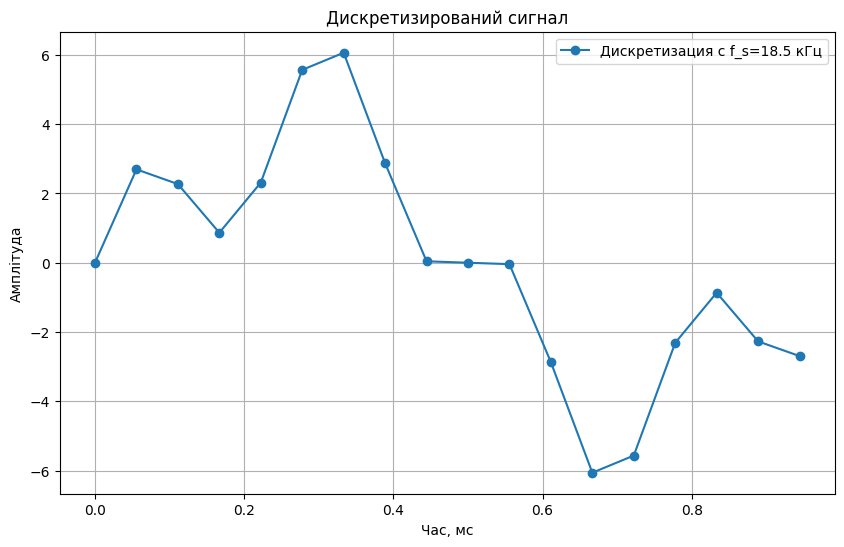

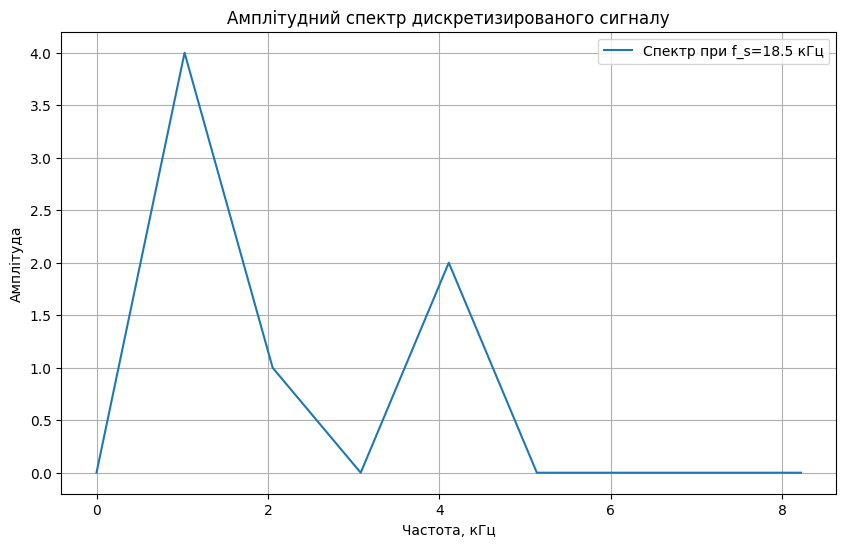

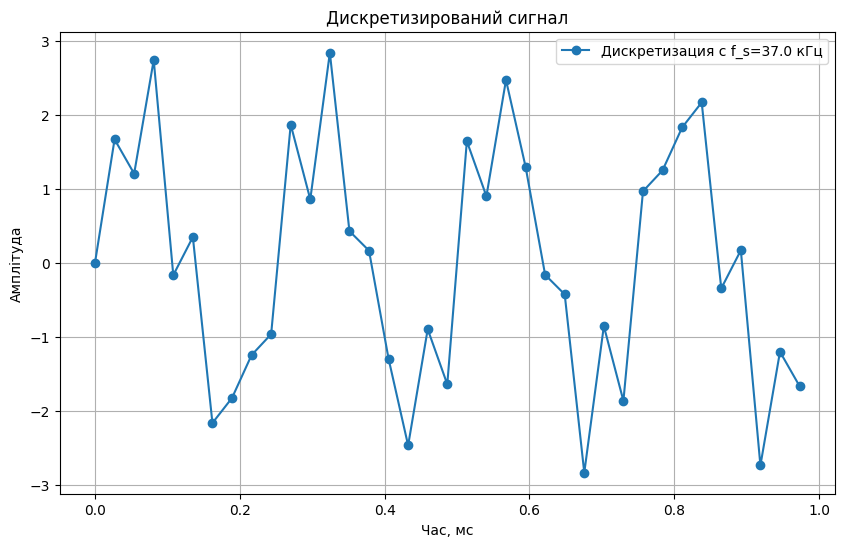

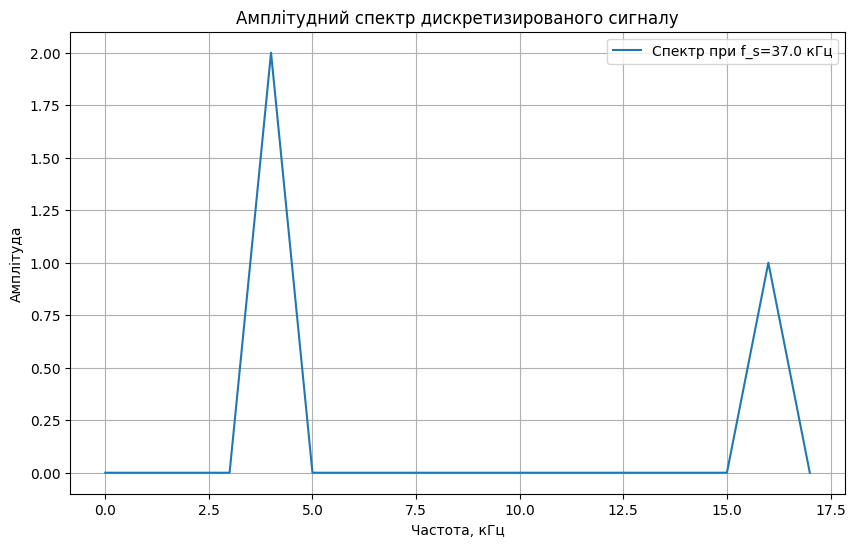

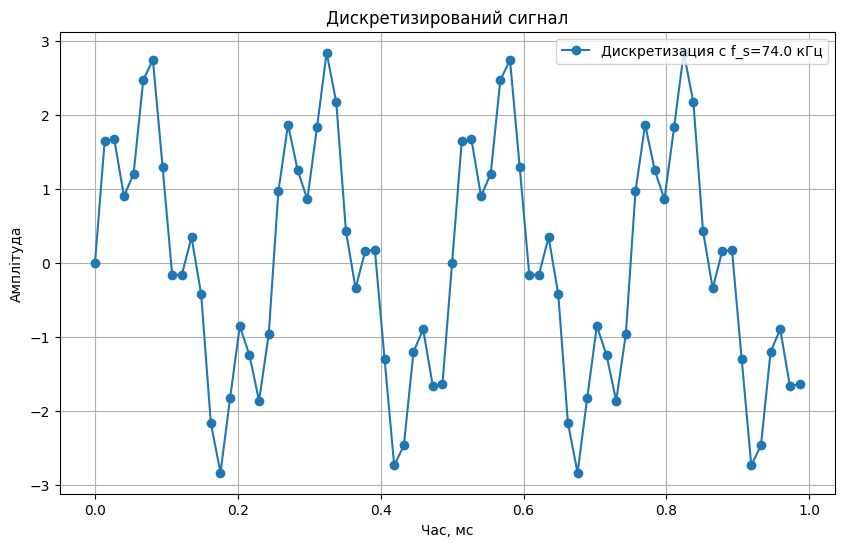

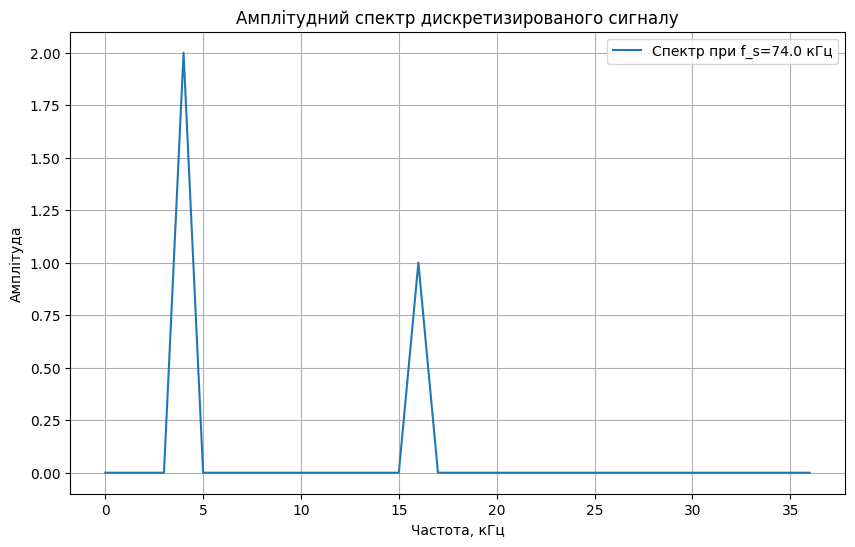

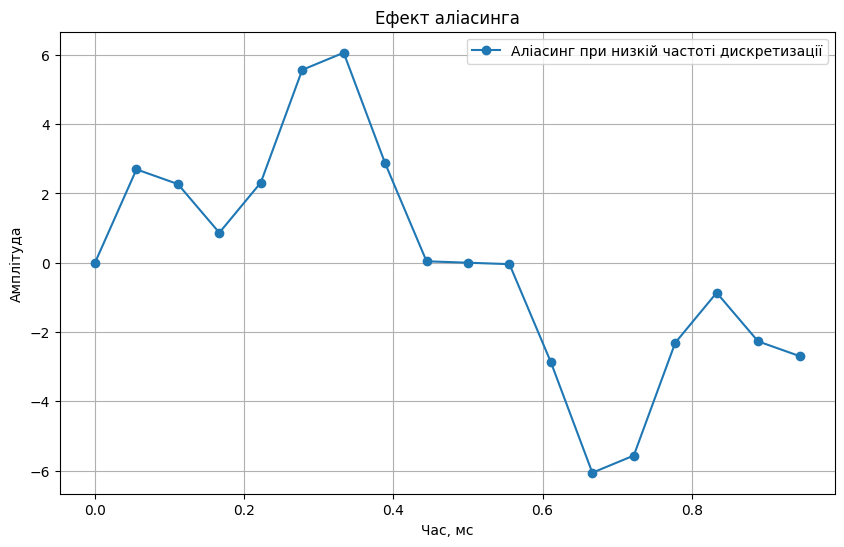

In [41]:
# Завдання 2:Вплив частоти дискретизацiї
# Максимальна частота сигналу
f_max = max(f1, f2, f3)

# Частоти дискретизації
sampling_rates = [f_max / 2, f_max, 2 * f_max]  

for rate in sampling_rates:
    t_sampled = np.linspace(0, duration, int(rate * duration), endpoint=False)
    signal_sampled = (A1 * np.sin(2 * np.pi * f1 * t_sampled) +
                      A2 * np.sin(2 * np.pi * f2 * t_sampled) +
                      A3 * np.sin(2 * np.pi * f3 * t_sampled))

    # Візуалізація дискретизированого сигналу
    plt.figure(figsize=(10, 6))
    plt.plot(t_sampled * 1e3, signal_sampled, 'o-', label=f"Дискретизация с f_s={rate/1000:.1f} кГц")
    plt.title("Дискретизирований сигнал")
    plt.xlabel("Час, мс")
    plt.ylabel("Амплітуда")
    plt.grid()
    plt.legend()
    plt.show()

    # Спектральный аналіз дискретизированого сигналу
    N_sampled = len(signal_sampled)
    signal_sampled_fft = fft(signal_sampled)
    frequencies_sampled = fftfreq(N_sampled, 1 / rate)
    amplitude_spectrum_sampled = 2 / N_sampled * np.abs(signal_sampled_fft[:N_sampled // 2])

    # Візуалізація спектра дискретизированого сигналу
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies_sampled[:N_sampled // 2] / 1000, amplitude_spectrum_sampled,
             label=f"Спектр при f_s={rate/1000:.1f} кГц")
    plt.title("Амплітудний спектр дискретизированого сигналу")
    plt.xlabel("Частота, кГц")
    plt.ylabel("Амплітуда")
    plt.grid()
    plt.legend()
    plt.show()

# Аналіз аліасинга
# Використання самої низької частоти дискретизації
rate_aliasing = f_max / 2

t_aliasing = np.linspace(0, duration, int(rate_aliasing * duration), endpoint=False)
signal_aliasing = (A1 * np.sin(2 * np.pi * f1 * t_aliasing) +
                   A2 * np.sin(2 * np.pi * f2 * t_aliasing) +
                   A3 * np.sin(2 * np.pi * f3 * t_aliasing))

# Визуалізація аліасинга
plt.figure(figsize=(10, 6))
plt.plot(t_aliasing * 1e3, signal_aliasing, 'o-', label="Аліасинг при низкій частоті дискретизації")
plt.title("Ефект аліасинга")
plt.xlabel("Час, мс")
plt.ylabel("Амплітуда")
plt.grid()
plt.legend()
plt.show()


In [42]:
# Завантаження реального сигналу (WAV-файл)
file_path = r"C:\Users\igort\Desktop\Цифрові засоби вимірювання\РГР\Гонки FORMULA-1_ финишная прямая, одна машина (online-audio-converter.com).wav"
  # Шлях до WAV-файлу
sampling_rate, signal = wavfile.read(file_path)

In [43]:
# Якщо сигнал двухканальний (стерео), беремо один канал
if len(signal.shape) > 1:
    signal = signal[:, 0]  # Беремо тільки лівий канал

In [44]:
# Часова шкала
duration = len(signal) / sampling_rate
time = np.linspace(0, duration, len(signal), endpoint=False)

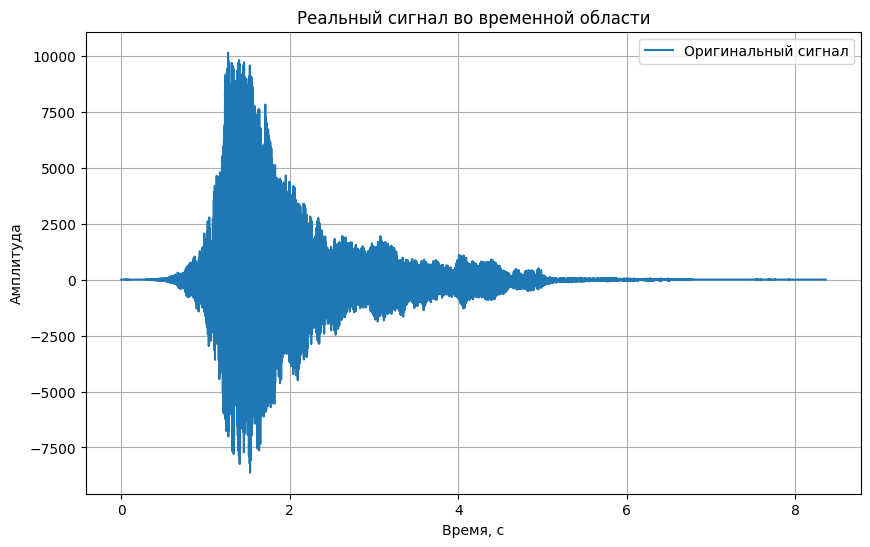

In [45]:
# Візуалізація реального сигналу в тимчасовій області
plt.figure(figsize=(10, 6))
plt.plot(time, signal, label="Оригинальный сигнал")
plt.title("Реальный сигнал во временной области")
plt.xlabel("Время, с")
plt.ylabel("Амплитуда")
plt.grid()
plt.legend()
plt.show()

In [46]:
# Спектральний аналіз
N = len(signal)
signal_fft = fft(signal)
frequencies = fftfreq(N, 1 / sampling_rate)
amplitude_spectrum = 2 / N * np.abs(signal_fft[:N // 2])

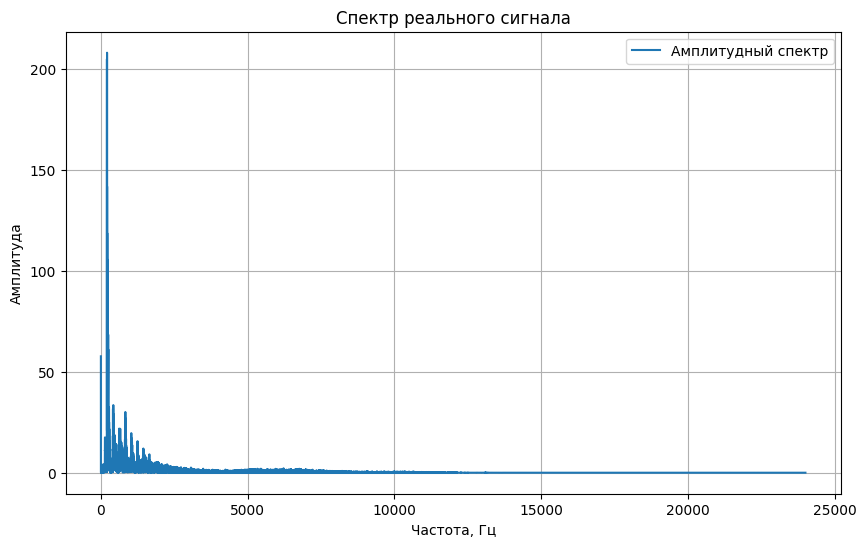

In [47]:
# Визуалізація спектра
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:N // 2], amplitude_spectrum, label="Амплитудный спектр")
plt.title("Спектр реального сигнала")
plt.xlabel("Частота, Гц")
plt.ylabel("Амплитуда")
plt.grid()
plt.legend()
plt.show()

In [48]:
low_cutoff = 300  # Низька границя фільтрації, Гц
high_cutoff = 3000  # Висока границя фільтраії, Гц

In [49]:
# Робимо фильтр (Butterworth)
sos = butter(4, [low_cutoff, high_cutoff], btype='band', fs=sampling_rate, output='sos')

In [50]:
# Фільтрація сигналу
filtered_signal = sosfiltfilt(sos, signal)

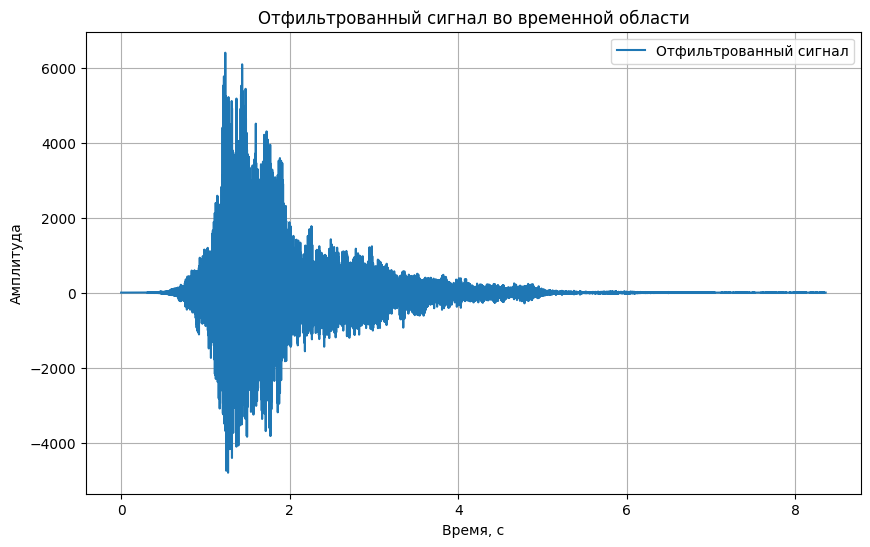

In [51]:
# Візуалізація відфільтрованого сигналу в тичасовій області
plt.figure(figsize=(10, 6))
plt.plot(time, filtered_signal, label="Отфильтрованный сигнал")
plt.title("Отфильтрованный сигнал во временной области")
plt.xlabel("Время, с")
plt.ylabel("Амплитуда")
plt.grid()
plt.legend()
plt.show()


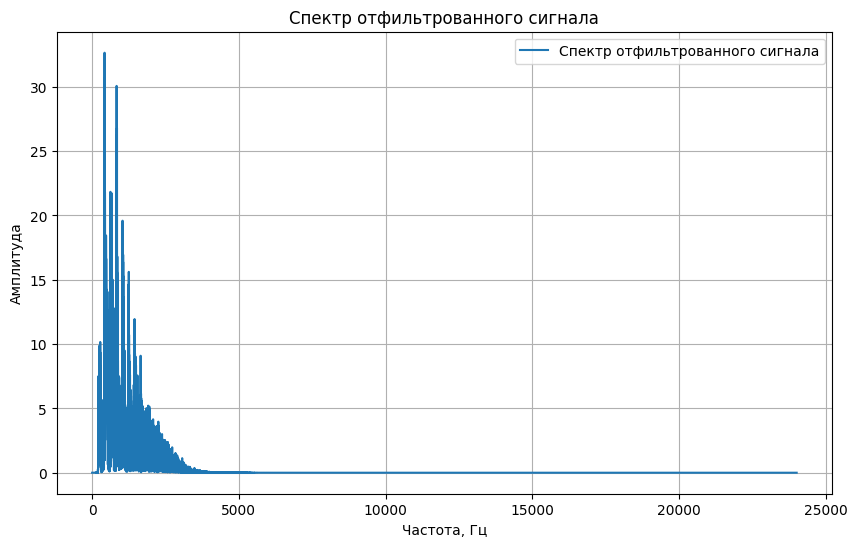

In [52]:
# Спектральний аналіз сигналу
filtered_signal_fft = fft(filtered_signal)
filtered_amplitude_spectrum = 2 / N * np.abs(filtered_signal_fft[:N // 2])

# Візуалізація спектру сигнала
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:N // 2], filtered_amplitude_spectrum, label="Спектр отфильтрованного сигнала")
plt.title("Спектр отфильтрованного сигнала")
plt.xlabel("Частота, Гц")
plt.ylabel("Амплитуда")
plt.grid()
plt.legend()
plt.show()